# 1. Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking fot total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**, **Cabin** 그리고 **Emabarkd** 에 null values가 존재함.

- 생존자의 수 확인

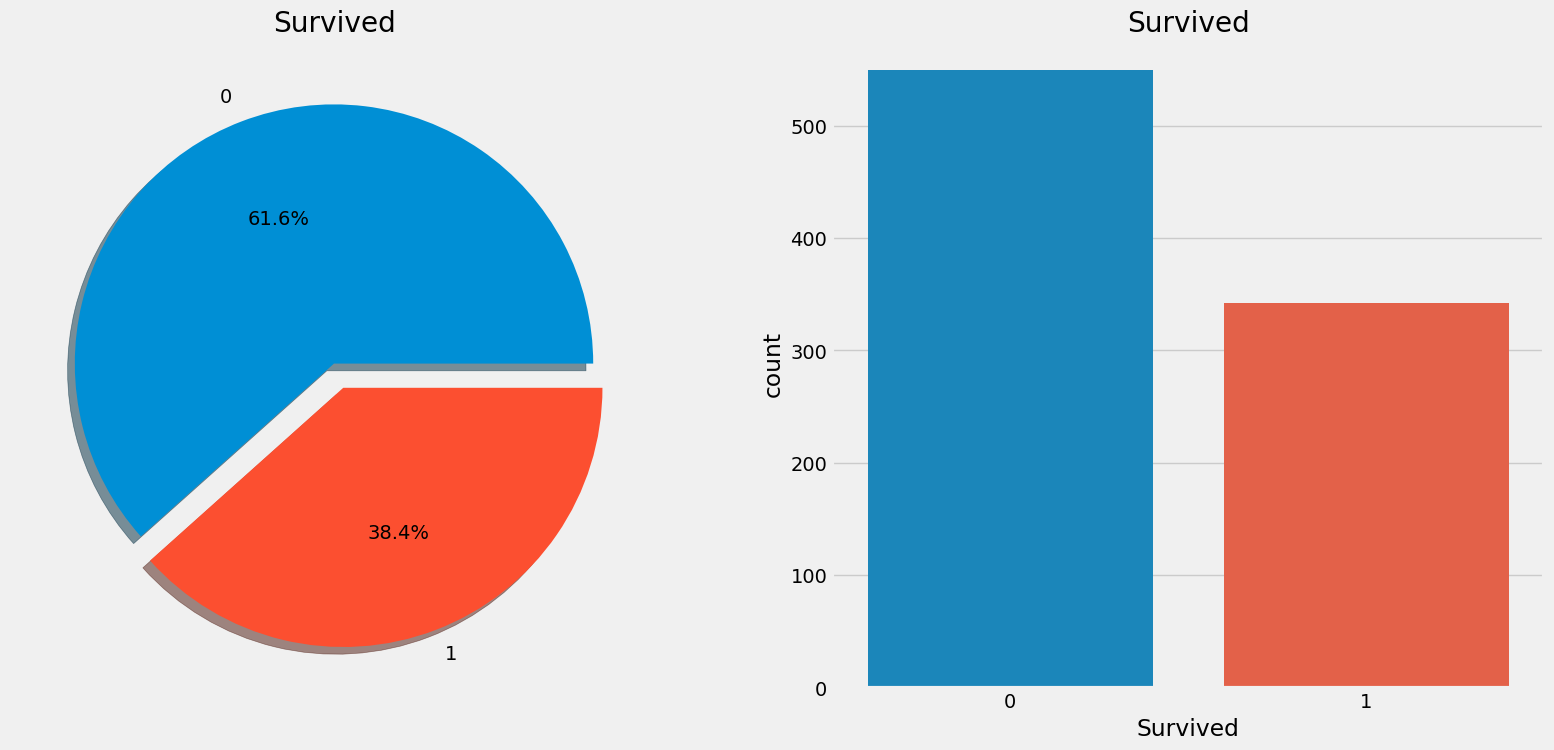

In [5]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 훈련세트에 포함된 891명중 350명만 생존함. 약 38.4%의 비율임.
- 어떤 범주의 승객이 생존했는지 알아보기 위해 feature에 대한 분석이 필요함.

## 1-1. Types of Features

**Categorical Features(범주형 변수)**
- 범주형 변수는 두개 이상의 범주를 가진 변수.
- 범주형 변수는 정렬하거나 순서를 지정할 수 없음.
- 이러한 변수를 Nominal Variables라고도 함.

ex) Sex, Embarked

**Ordinal Feature(서수형 변수)**
- 값사이에 상대적인 순서가 존재함.

ex) PClass

**Continous Feature(연속형 변수)**
- 두 점사이 또는 열의 최소값 최대값 사이의 값을 취할 수 있는 경우.

ex) Age

## 1-2. Analysing The Features

### 1-2-1. Sex (Categorical Feature)

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

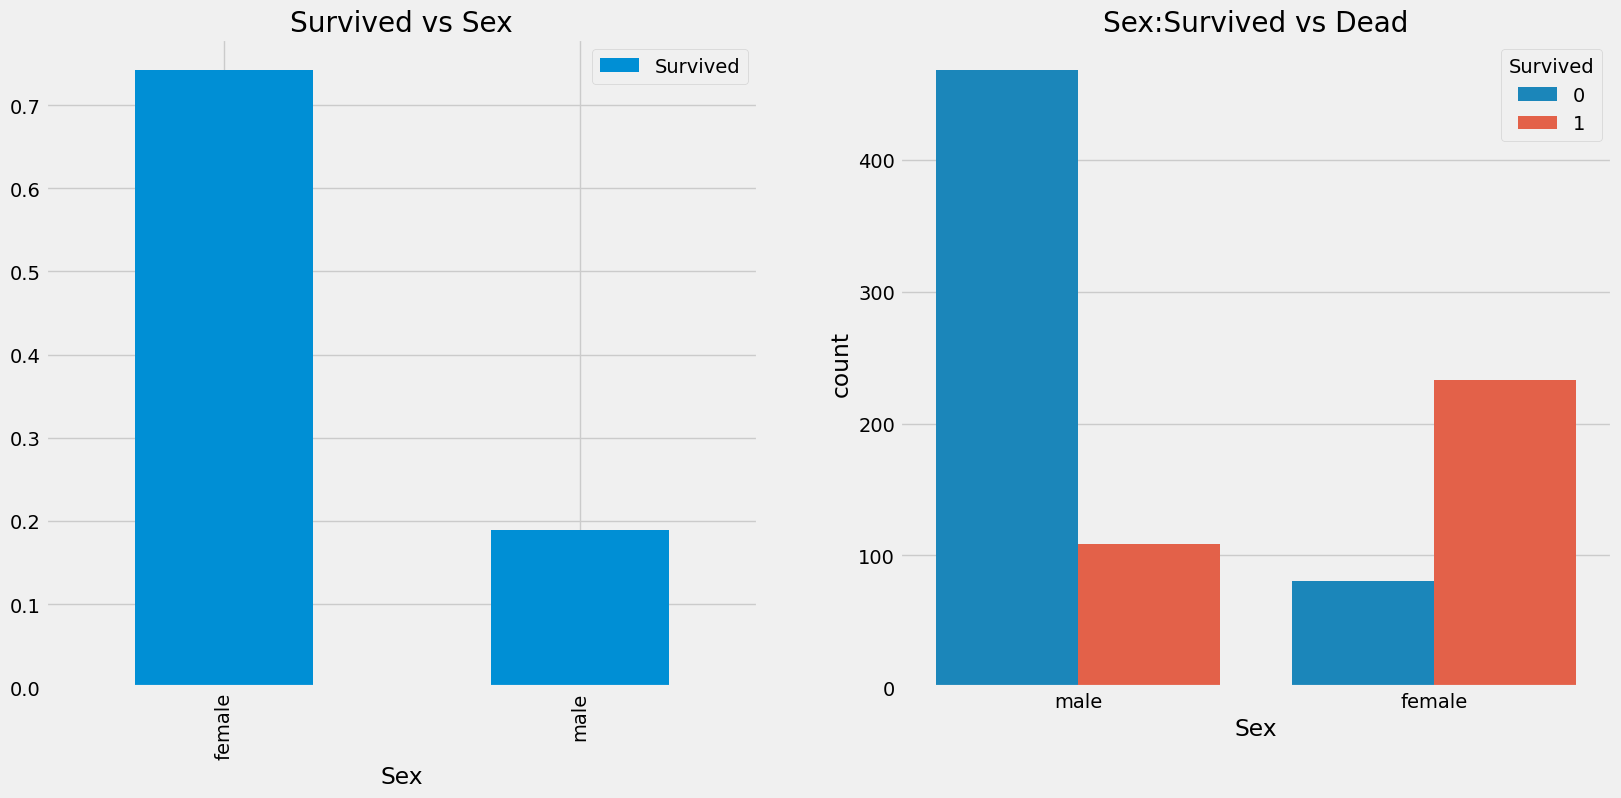

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 배에 탄 남성의 수는 여성의 수보다 훨씬 많음.
- 하지만 생존자 중 여성의 수는 남성의 수보다 거의 두배가 많음.
- 배에 탄 여성의 생존확률은 약 75%, 남성의 생존확률은 약 18~19%

### 1-2-2. Pclass (Ordinal Feature)

In [8]:
pd.crosstab(data.Pclass, data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


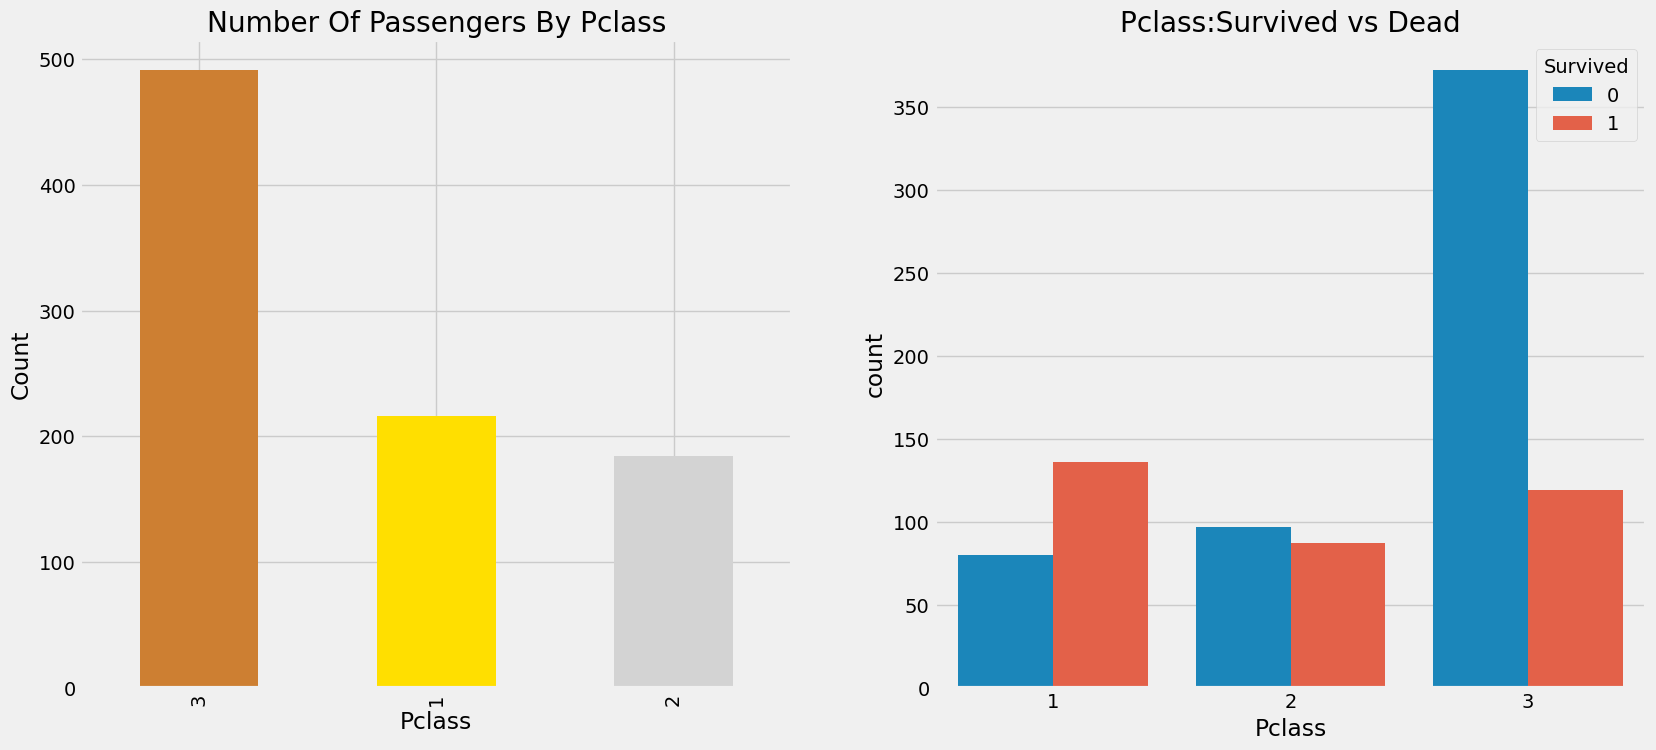

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue= 'Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Pclass 1의 경우 생존율이 약 63%이고 2의 경우 48%임.
- 3의 경우 탑승객의 숫자는 훨씬 많지만, 약 25%만 생존한 것을 확인할 수 있음.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

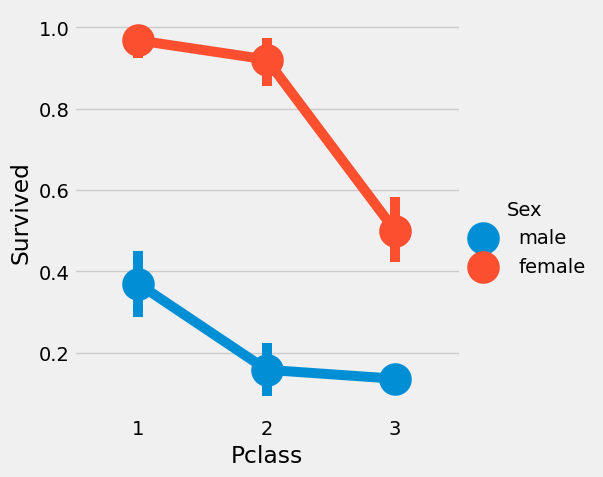

In [11]:
sns.catplot(x='Pclass',y='Survived',hue = 'Sex',data=data,kind='point')
plt.show()

- Pclass 1의 여성 94명 중 3명만 사망했기 때문에, Pclass 1 여성의 생존율이 약 95~96%라는 것을 추론할 수 있음.
- Pclass에 관계없이 구조하는 동안 여성이 최우선 순위를 차지한 것은 분명함.
- Pclass 1의 남성도 생존율이 낮음.

### 1-2-3. Age (Continous Feature)

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


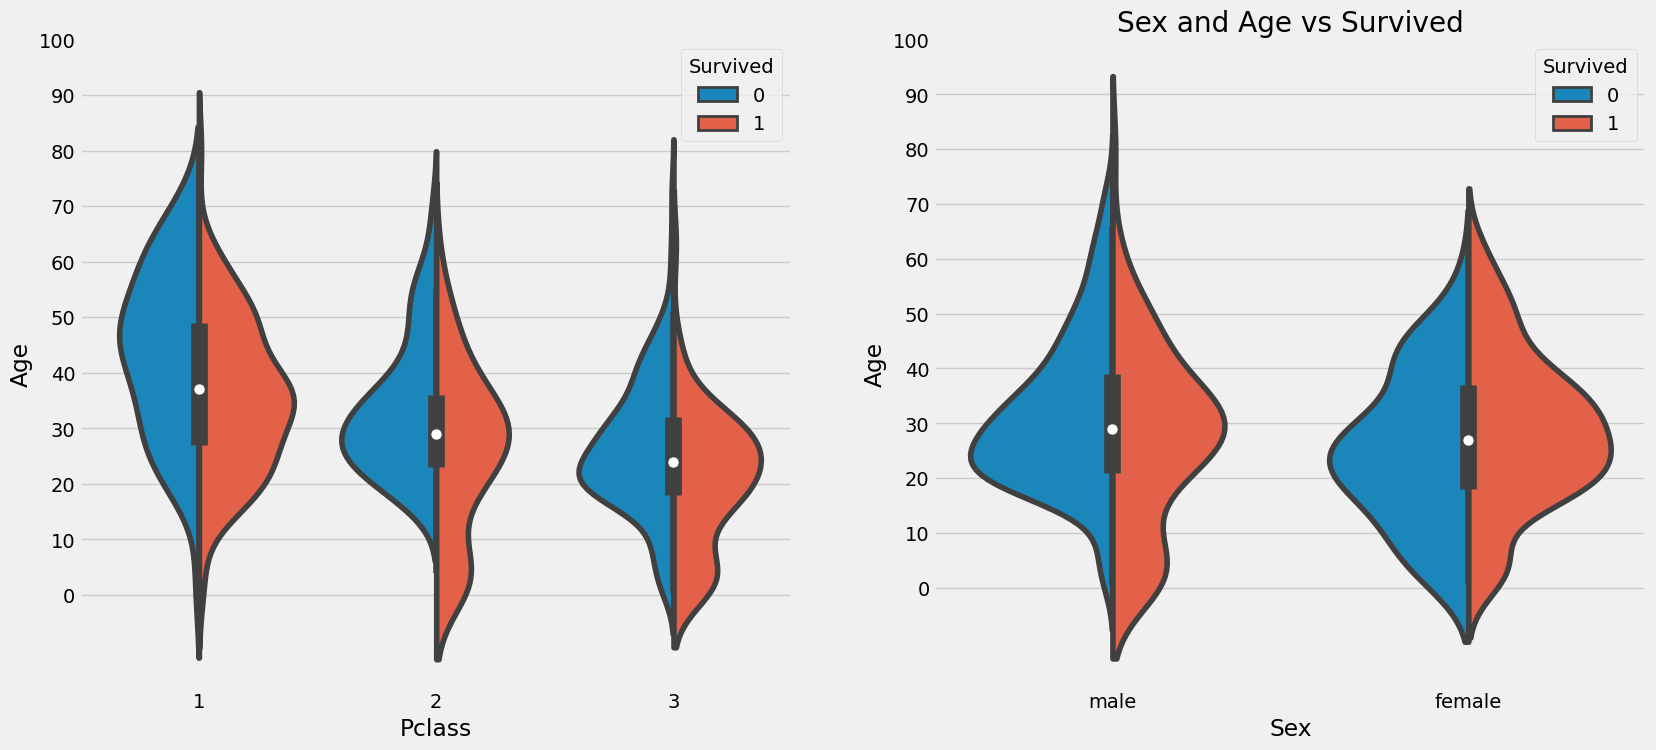

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

- 어린이 수는 Pclass에 따라 증가하며, 10세 미만의 승객의 생존확률은 Pclass에 관계없이 양호함.
- Pclass1의 20-50대 탑승객의 생존가능성은 높으며, 여성의 경우 훨씬 더 좋음.
- 남성의 경우 연경이 증가 할 수록 생존가능성이 감소함.

- Age에는 177개의 null값이 존재하기 때문에 대체값이 필요함.
- 이름을 사용해서 각 이름의 Initial에 해당하는 나이의 평균값을 할당하면 됨.

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- Filling NaN Ages

In [18]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any()

False

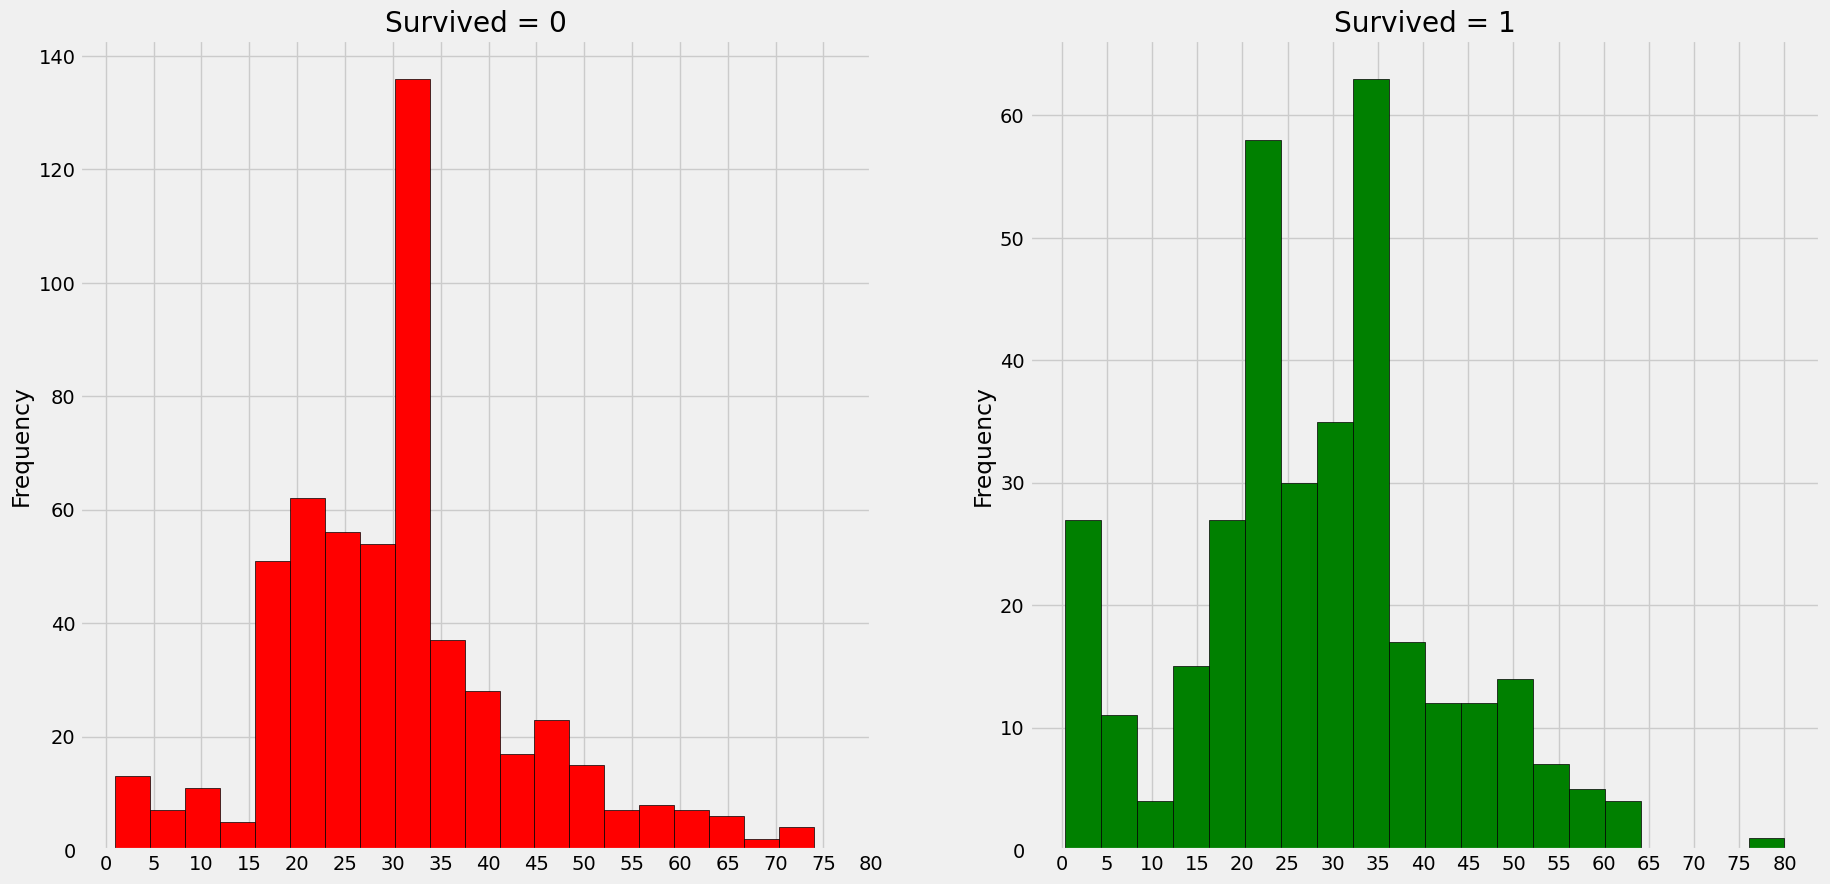

In [20]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- 5세미만의 유아들의 대부분이 구조 되었음.(여성과 아이들 먼저 구조)
- 가장 고령의 탑승객이 구조됨.(80세)
- 가장 많은 수의 사망자들은 30-40대의 그룹에서 나타남.

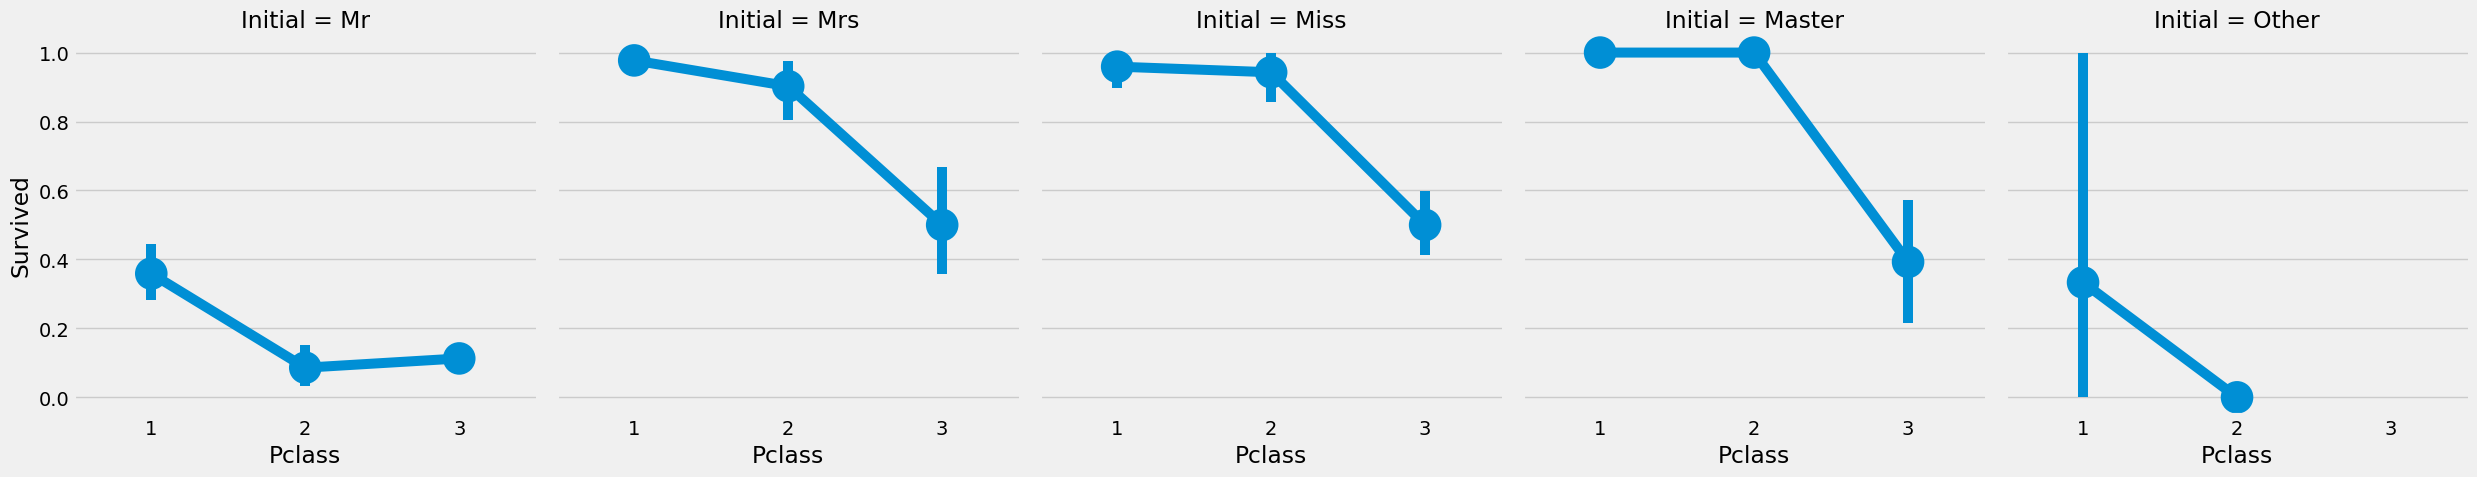

In [21]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data,kind='point')
plt.show()

### 1-2-4. Embarked (Categorical Value)

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap="summer_r")

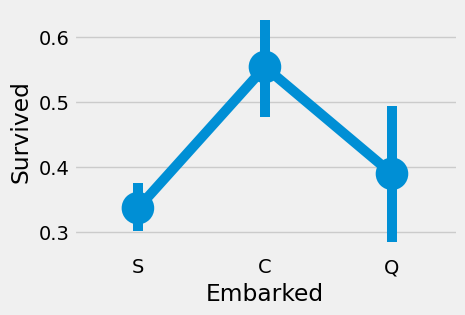

In [23]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- C에서 탑승한 경우 생존확률이 약 55%로 가장 높고
- S에서 탑승한 경우 가장 낮음.

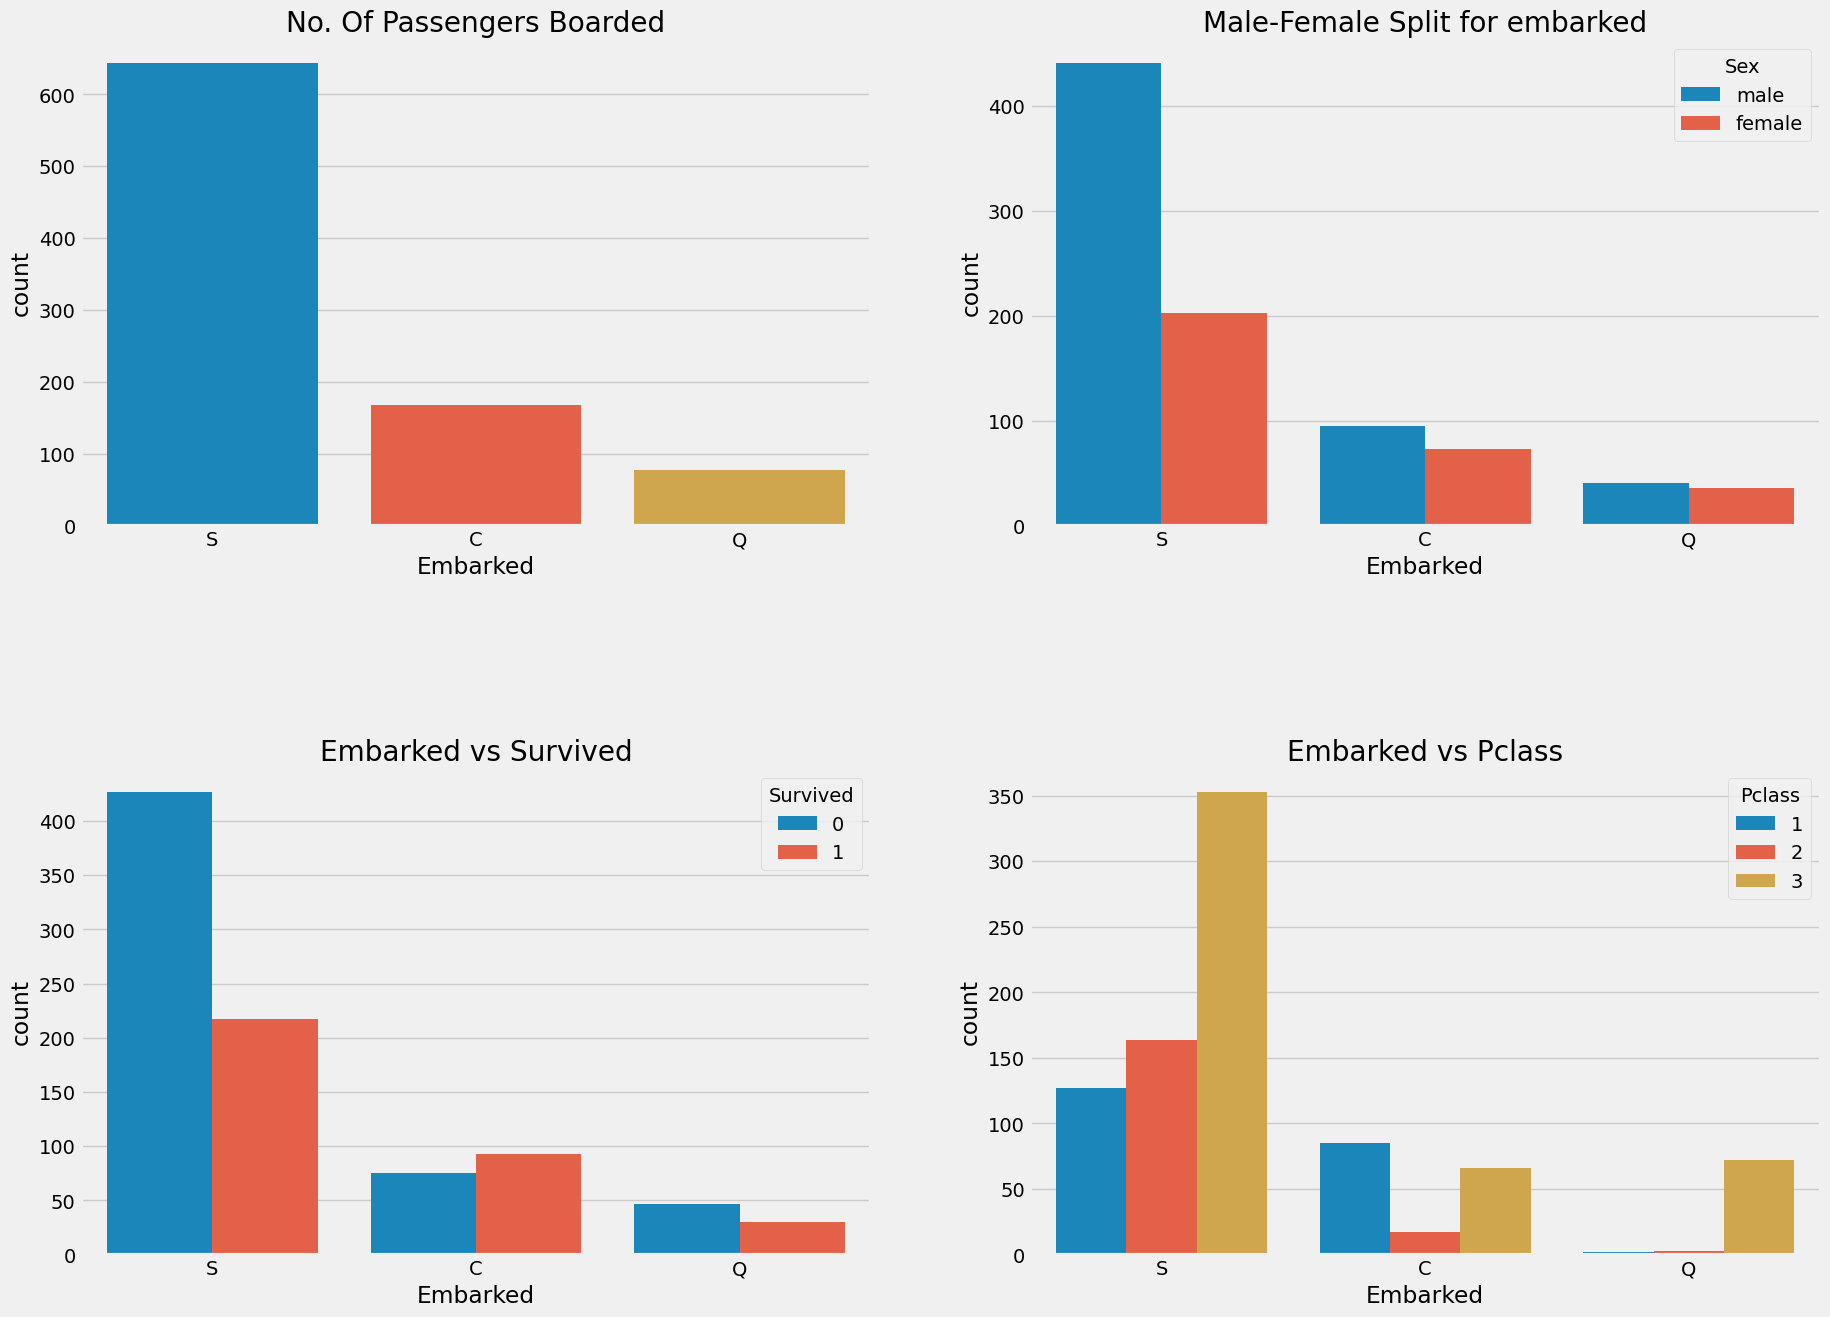

In [24]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data = data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- S에서 가장 많은 탑승함. 대부분이 Pclass 3의 탑승객임.
- C의 탑승객은 상당수가 생존함.
- S는 부유한 탑승객들이 탑승한 항구이나, 81%의 Pclass3 승객이 생존하지 못했기 때문에 생존 가능성이 낮음.
- Q항구의 승객 95%가까이가 Pclass3임.

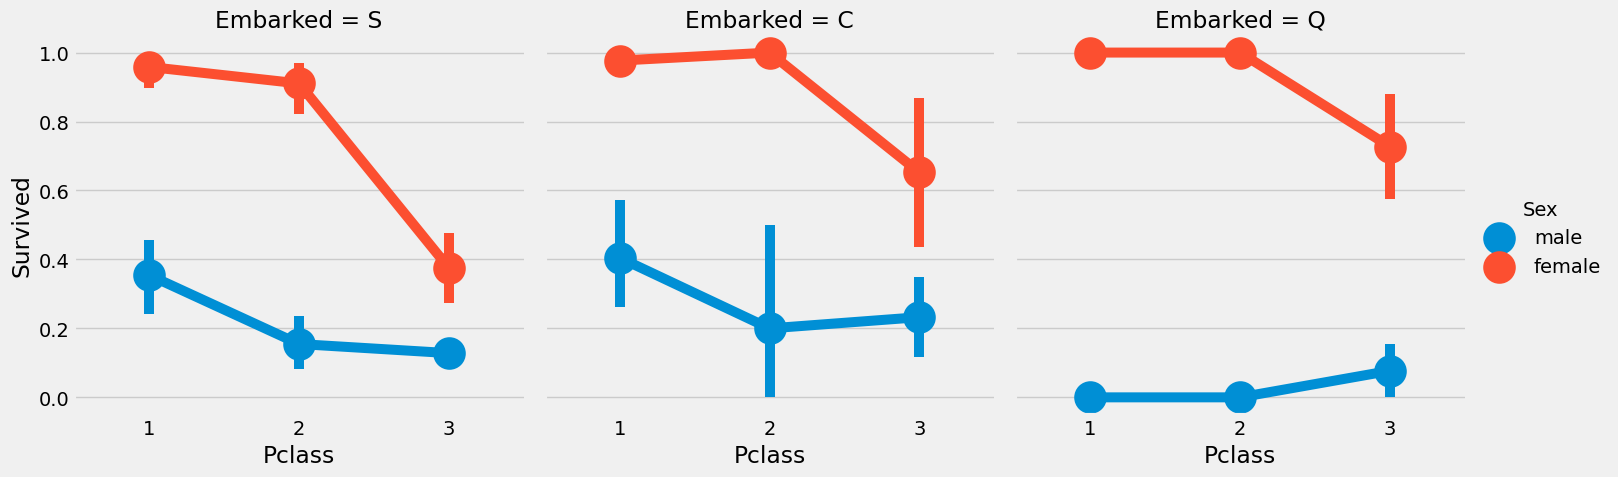

In [25]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind="point")
plt.show()

- 여성의 생존확률은 Pclass에 관계 없이 Pclass1과 Pclass2에 대해 거의 우선임.
- 포트 S의 Pclass 3 남성과 여성의 생존확률은 매우 낮음.

S항에서 최대 승객이 탑승하였으므로 NaN값을 S로 대체함.

In [26]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

### 1-2-4. SibSip (Discrete Feature)

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


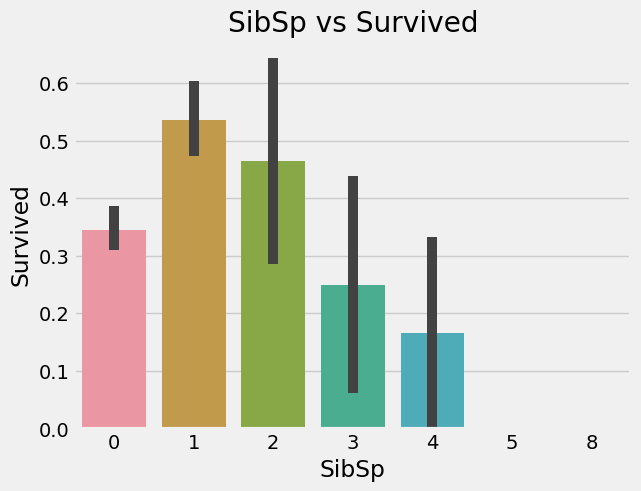

In [28]:
# f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data)
plt.title('SibSp vs Survived')
plt.show()

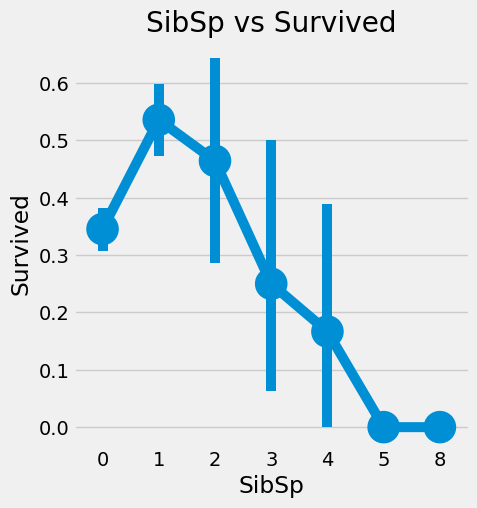

In [29]:
# sns.set(rc={'figure.figsize':(30, 5)})

plt.close()
sns.catplot(x='SibSp',y='Survived',data=data,kind='point')
plt.title('SibSp vs Survived')
plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- barplot과 catplot의 관찰 결과 혼자탄 승객들의 생존확률은 약 34.5%임.
- 형제 자매가 늘어날 수록 대체적으로 생존확률이 감소함을 볼 수 있음.
- 배에 가족이 같이 있다면 가족을 살리려고 하기 때문.
- 5-8인의 가족 탑승객의 생존확률은 0에 수렴함.
- 이유는 Pclass 3에 주로 탑승했기 때문임.

### 1-2-6.Parch

In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- 가족의 수가 클수록 Pclass3임을 볼 수 있음.

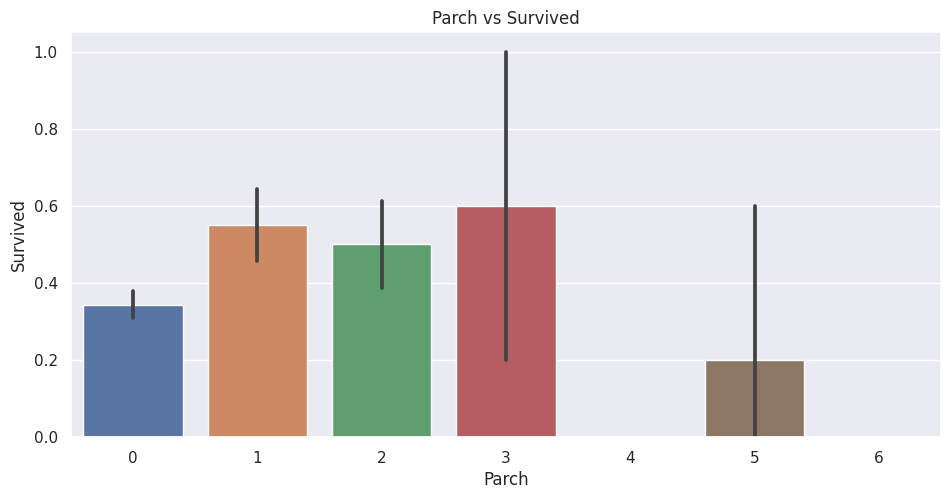

In [32]:
# f,ax=plt.subplots(1,2,figsize=(20,8))
sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(x='Parch',y='Survived',data=data)
plt.title('Parch vs Survived')
plt.show()

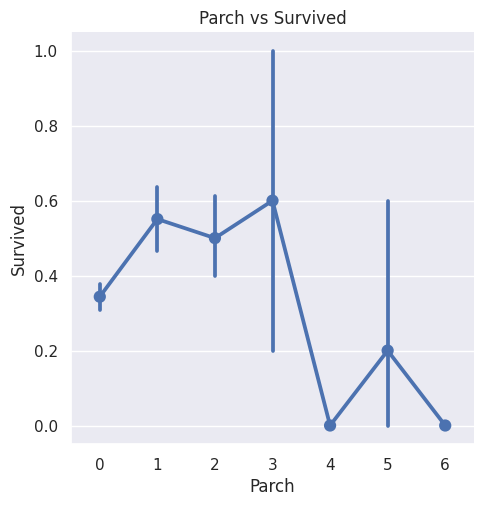

In [33]:
sns.catplot(x='Parch',y='Survived',data=data,kind='point')
plt.title('Parch vs Survived')
plt.show()

- 부모 혹은 자식의 수가 1-3명 일 때 생존 확률이 가장 높다.
- 0명이거나 4명 이상일 경우 생존 확률이 감소하게 되는 추세임.

### 1-2-7. Fare (Continous Feature)

In [34]:
print('Highest Fare was',data['Fare'].max())
print('Lowest Fare was',data['Fare'].min())
print('Average Fare was',data['Fare'].mean())

Highest Fare was 512.3292
Lowest Fare was 0.0
Average Fare was 32.204207968574636


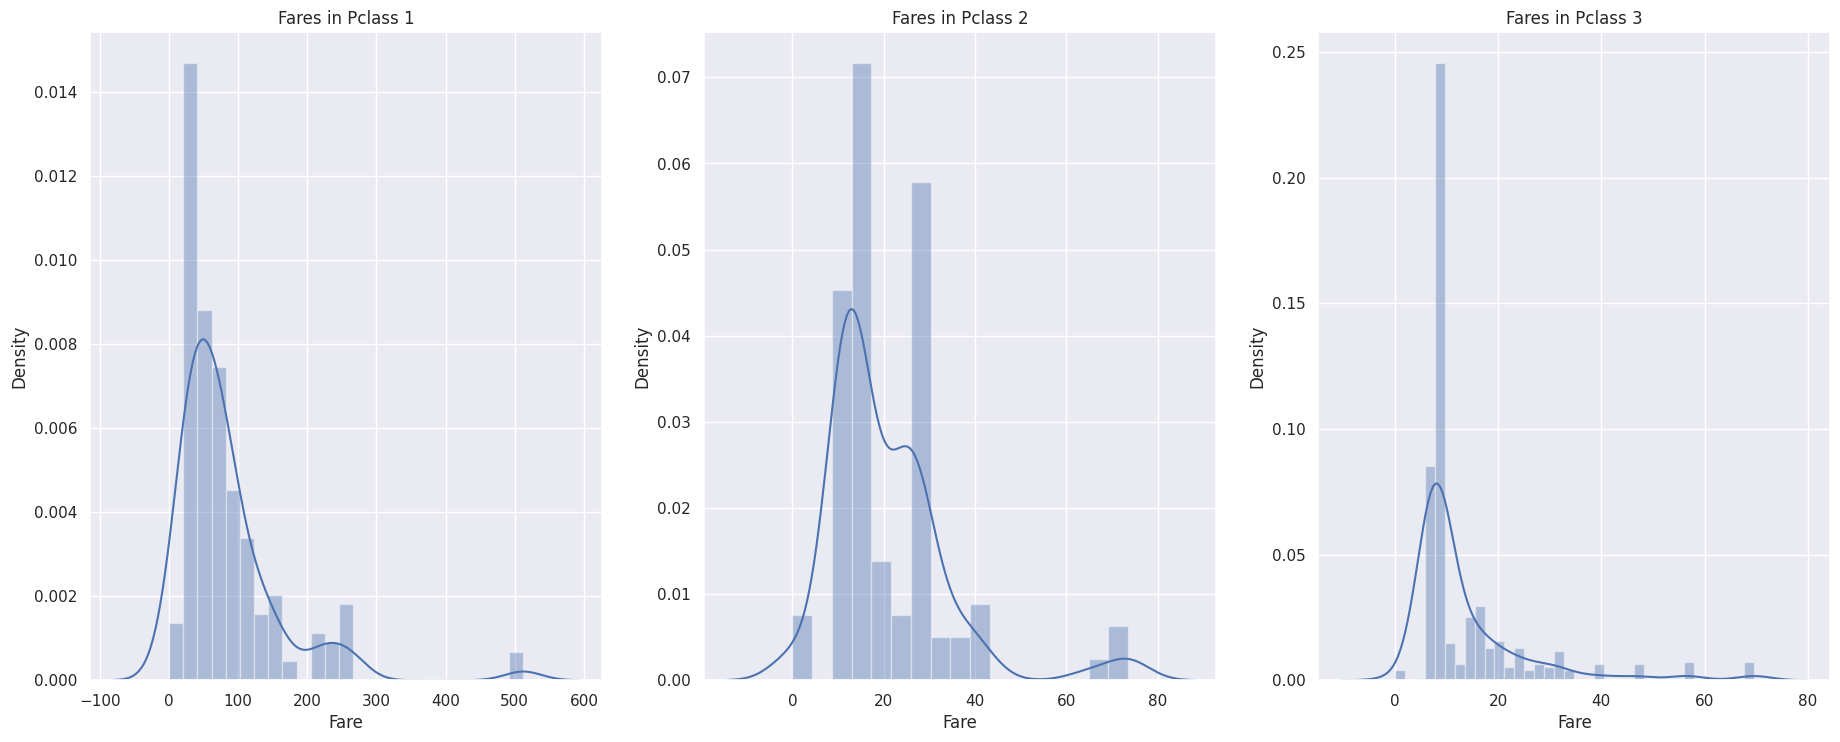

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## 1-3. Observations for all features

- Sex : 여성의 경우 남성보다 생존확률이 높음.
- PClass : Pclass가 좋을수록 생존확률이 높음.
- Age : 5-10세의 어린 아이들은 생존확률이 매우 높음. 15-35세 사이의 탑승객은 사망할 확률이 높음.
- Embarked : 대부분 Pclass1 승객이 S에서 많이 탑승하였으나 C에서의 탑승객이 탑승 확률이 높음. Q에서의 승객은 모두 Pclass3
- Parch+SibSp : 1-2남매, 배우자가 탑승하거나 1-3부모 자식이 함께 여행하는게 혼자 있거나 대가족과 함께 여행하는 경우보다 더 생존확률이 높음.

## 1-4. Correlation Between The Features

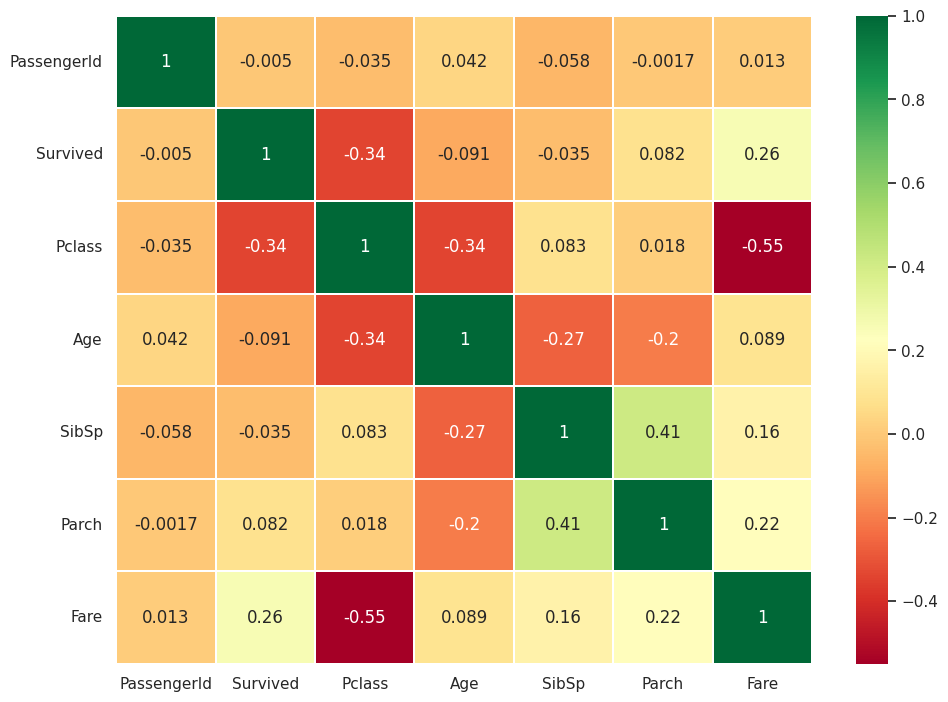

In [36]:
# 숫자형 컬럼 타입 컬럼명만 num_cols로 추출
# 판다스 버전 업그레이드로 인, corr() 호출 시 숫자형 컬럼만 자동으로 선택하지 않음

num_cols = data.dtypes[data.dtypes !='object'].index.to_list()

corr = data[num_cols].corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

del num_cols

- 서로 큰 상관관계를 보이는 feature이 없으므로 따로 제거하지 않아도 될 것 같음.

# 2. Feature Engineering and Data Cleaning

## 2-1. Age_band

- 연속형 변수를 범주형 변수로 변환.

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


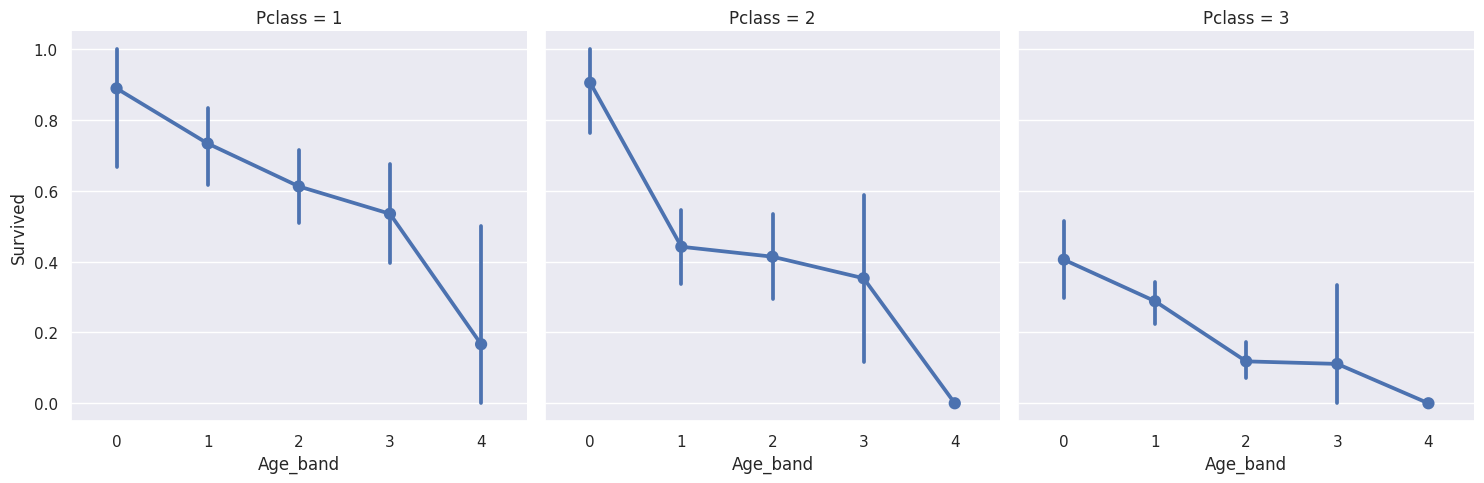

In [39]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

- Pclass에 상관없이 나이에 따라 생존확률이 감소하는 경향을 보임.
  

## 2-2. Family_Size and Alone

- Parch와 SibSp 특성을 합쳐 Family_Size, Alone 특성을 새로 만듦.
- 생존확률이 승객의 가족규모와 연관있는지 확인하는 특성임.
- Alone은 승객이 혼자인지 아닌지를 나타냄.

In [40]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # family size
data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone'] = 1

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


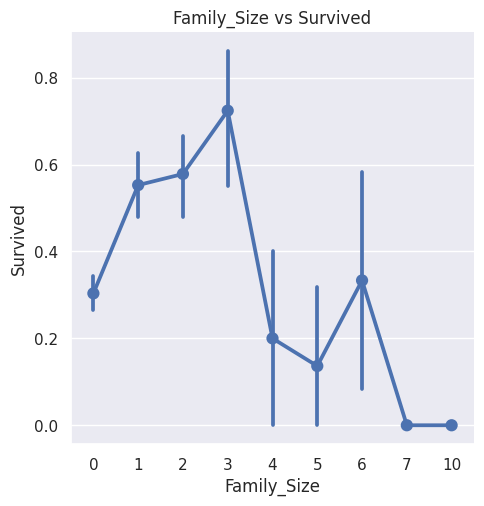

In [42]:
sns.catplot(x='Family_Size',y='Survived',data=data,kind = 'point')
plt.title('Family_Size vs Survived')
plt.show()

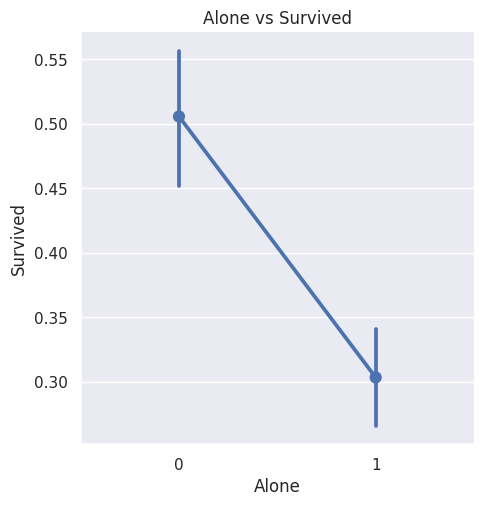

In [43]:
sns.catplot(x='Alone',y='Survived',data=data,kind = 'point')
plt.title('Alone vs Survived')
plt.show()

- 가족 규모가 0인 경우 혹은 4이상인 경우 생존확률이 낮음.

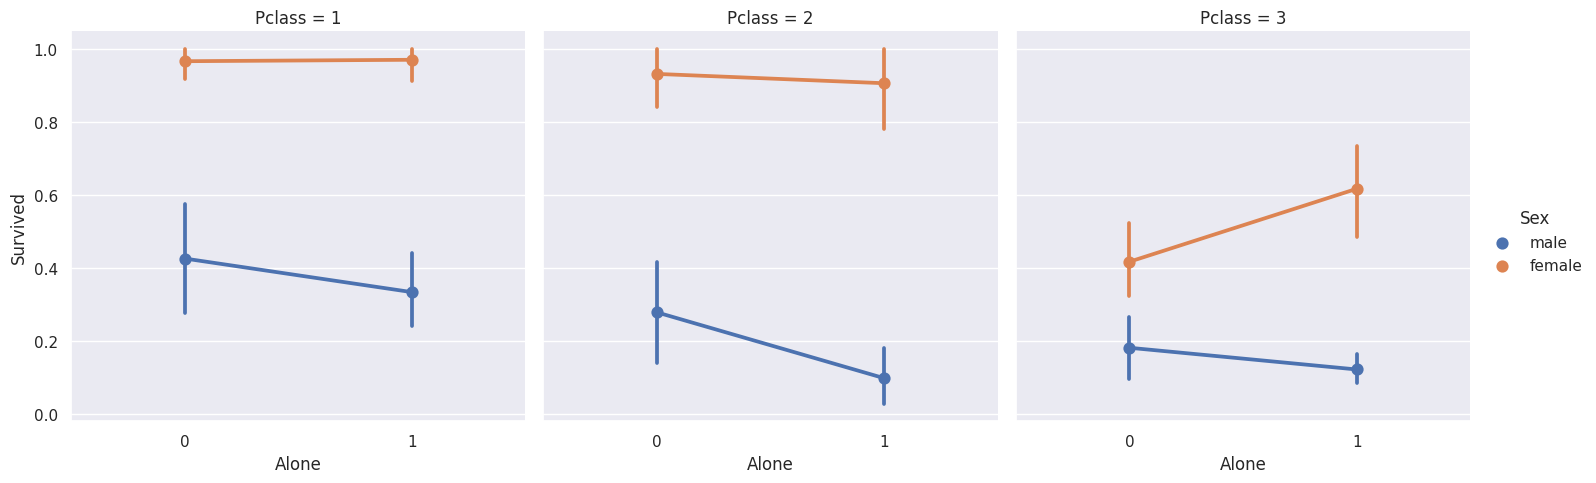

In [44]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

- 혼자 있는 경우가 생존확률이 낮음.
- 가족이 있는 여성보다 혼자 있는 가능성이 높은 Pclass3를 제외한 성별 또는 Pclass에 관계없이.

## 2-3. Fare_Range

- Fare도 연속형데이터이기 때문에 서수값으로 변형해야함.
- pandas.qcut 함수를 활용함.

In [45]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- Fare_Range가 증가할수록 생존확률도 늘어나는 것을 확인할 수 있음.
- Age_Band처럼 독자적인 값으로 변환해야함.

In [46]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] = 3

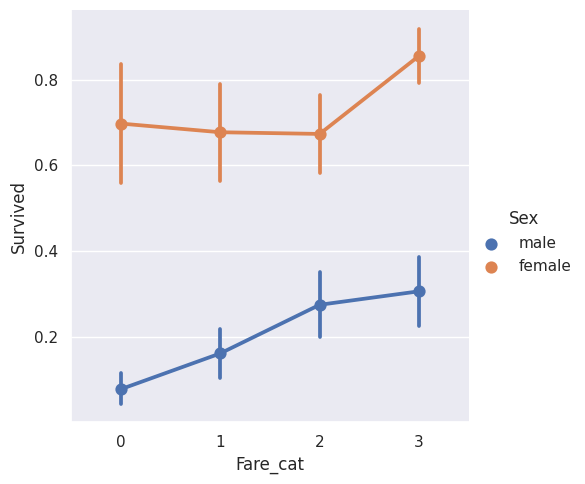

In [47]:
sns.catplot(x='Fare_cat',y='Survived',data=data,kind='point',hue='Sex')
plt.show()

- 명확히 Fare_cat이 증가할수록 생존확률이 높아짐.
- 이 feature는 중요한 특성이 될 수 있음.

## 2-4. Convertion String Values into Numeric

- 머신러닝에는 string 데이터를 사용할 수 없으므로 Sex, Embarked의 데이터는 숫자형 데이터로 변환해야함.

In [48]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace = True)

## 2-5. Dropping UnNeeded Features

- **Name** --> 범주형 값으로 변환할 수 없기 때문에 사용할 수 없음.

- **Age** --> Age_band 특성이 있기 때문에, 필요하지 않음.

- **Ticket** --> 랜덤한 string값이기 때문에 범주화 할 수 없음.

- **Fare** --> Fare_cat특성이 있기 때문에, 필요하지 않음.

- **Cabin** --> 많은 NaN값과 많은 승객들이 다양한 Cabin을 가지고 있음. 그래서 사용할 수 없는 특성임.

- **Fare_Range** --> fare_cat특성을 사용하면 됨.

- **PassengerId** --> 범주화 할 수 없음.

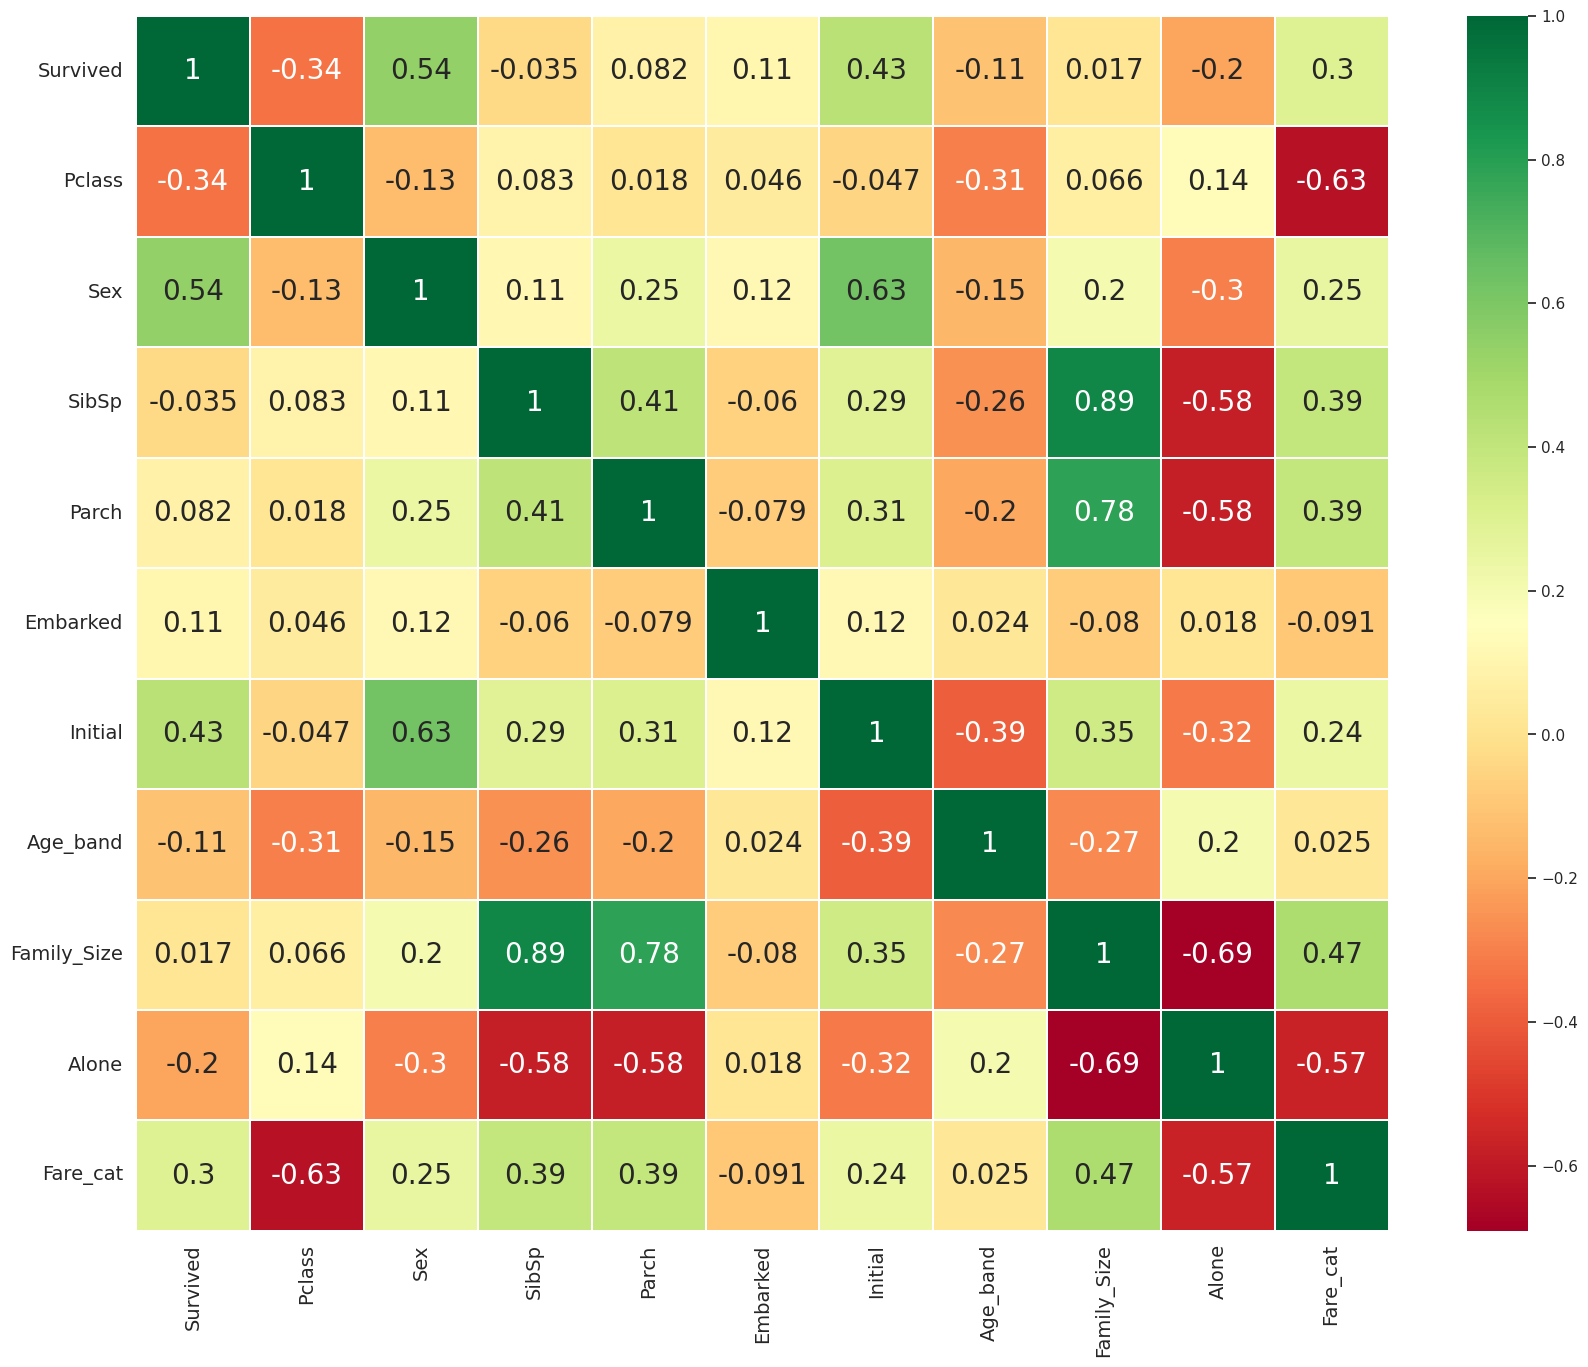

In [49]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 3. Predictive Modeling

- 분류 알고리즘을 사용하여 승객의 생존여부를 예측할 것임.
 
 

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [51]:
train, test = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## 3-1. Radial Support Vector Machines(rbf-SVM)

**svm 튜닝**
- gamma변수와 C변수를 조절하여 튜닝이 이루어짐.
- gamma변수는 하나의 훈련샘플이 미치는 영향의 범위를 결정.
- C 매개변수는 각 포인트의 중요도(정확히는 dualcoef값)를 제한하는 매개변수로, 해당값이 커질수록 결정 데이터에 정확하게 맞춰짐.

In [52]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


## 3-2. Linear Support Vector Machine(linear-SVM)

In [53]:
model = svm.SVC(kernel='rbf',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for rbf SVM is  0.832089552238806


## 3-3. Logistic Regression

In [54]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for the Logistic Regression is ',metrics.accuracy_score(prediction3,test_Y))

Accuracy for the Logistic Regression is  0.8134328358208955


## 3-4. Decision Tree

In [55]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for the Decision Tree is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy for the Decision Tree is  0.8059701492537313


## 3-5. K-Nearest Neighbours(KNN)

In [56]:
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for the KNN is ',metrics.accuracy_score(prediction5,test_Y))

Accuracy for the KNN is  0.8134328358208955


- K 값에 따른 KNN 모델의 정확도 비교하기.

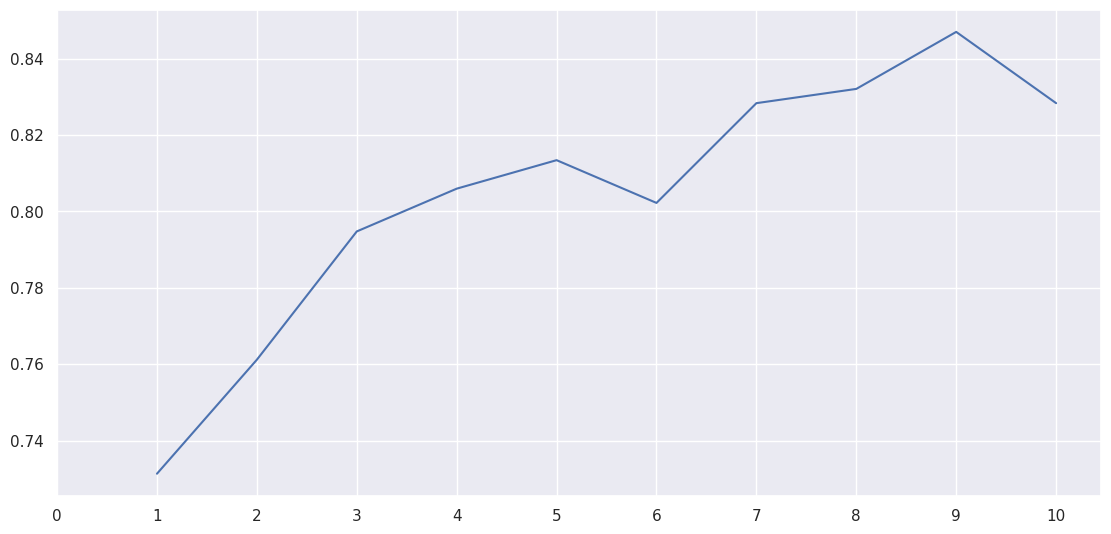

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [57]:
a_index = list(range(1,11))
a=pd.Series()
x=list(range(0,11,1))

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a = pd.concat([a,pd.Series(metrics.accuracy_score(prediction,test_Y))],ignore_index=True)
    
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as',a.values.max())

## 3-6. Gaussian Naive Bayes

In [58]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for the NaiveBayes is ',metrics.accuracy_score(prediction6,test_Y))

Accuracy for the NaiveBayes is  0.8134328358208955


## 3-7. Random Forests

In [59]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is ',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is  0.8208955223880597


- 분류기의 견고성을 결정하는 요인은 모델의 정확성만이 아님.
- 분류기로서는 좋은 정확도일지라도 새로운 테스트 세트에 대해서 90%이상을 보장할 수 없음.
- 분류기가 어떤 인스턴스를 사용하여 자체적으로 학습할지 결정할 수 없기 때문에 확신할 수 없음.
- 학습 및 테스트 데이터가 변경됨에 따라 정확도도 변경됨. 증가하거나 감소할 수 있음. 이를 model variance라고 함.
- 이를 극복하고 일반화된 모델을 얻기 위해 교차검증을 사용함.

## 3-8. Cross Validation
- 데이터가 불균형한 경우가 많으며, class1 인스턴스의 수는 많지만 다른 class 인스턴스의 수는 적을 수 있음.
- 데이터셋의 인스턴스에 대해 알고리즘을 훈련하고 테스트 해야함.
- 그런 다음 데이터셋에 대해 언급된 모든 정확도의 평균을 취할 수 있음.

1) K-폴드 교차 검증은 먼저 데이터셋을 K-하위 집합으로 나누는 방식으로 작동함.
2) 데이터셋을 (K=5)부분으로 나눈다고 가정했을때, 테스트를 위해 1부분을 지정해두고 4부분에 걸쳐 알고리즘을 훈련함
3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 훈련함으로써 프로세스를 계속 진행함. 그런 다음 정확도와 오류를 평균화하여 알고리즘의 평균 정확도를 얻음.

**이를 K-Fold Cross Validation이라고 함.**

4) 알고리즘은 일부 훈련 데이터에 대해 데이터셋에 과소 적합할 수 있으며, 때로는 다른 훈련셋에 대해 데이터를 과대 적합할 수도 있음. 따라서 교차검증을 통해 일반화된 모델을 달성할 수 있음.

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10,random_state=22, shuffle=True)
xyz = []
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),
          LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(),GaussianNB(),
          RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'Std':std},index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803608,0.042326
Naive Bayes,0.795843,0.054861
Random Forest,0.810362,0.042869


<Axes: >

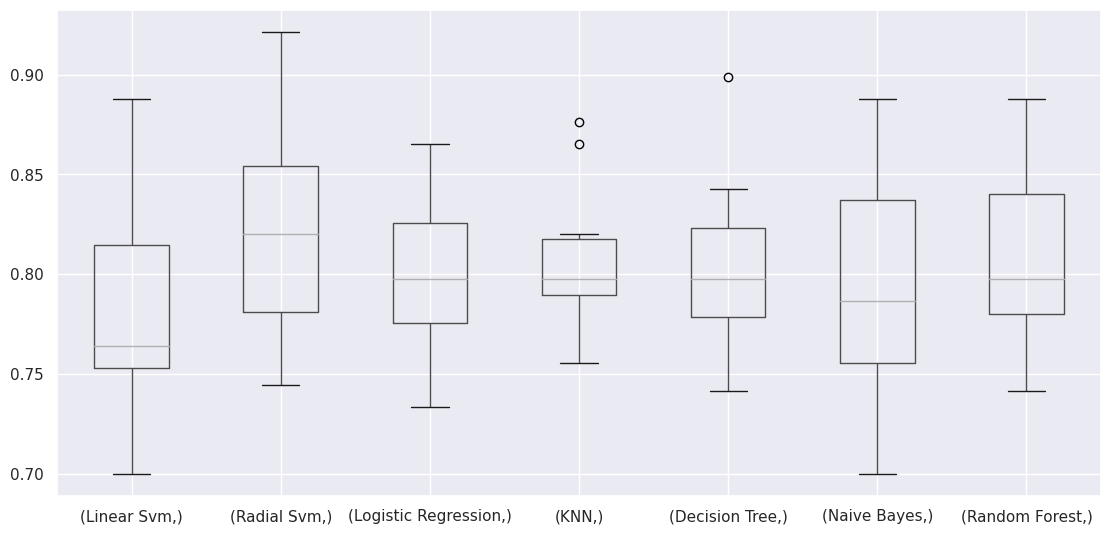

In [61]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index = [classifiers])
box.T.boxplot()

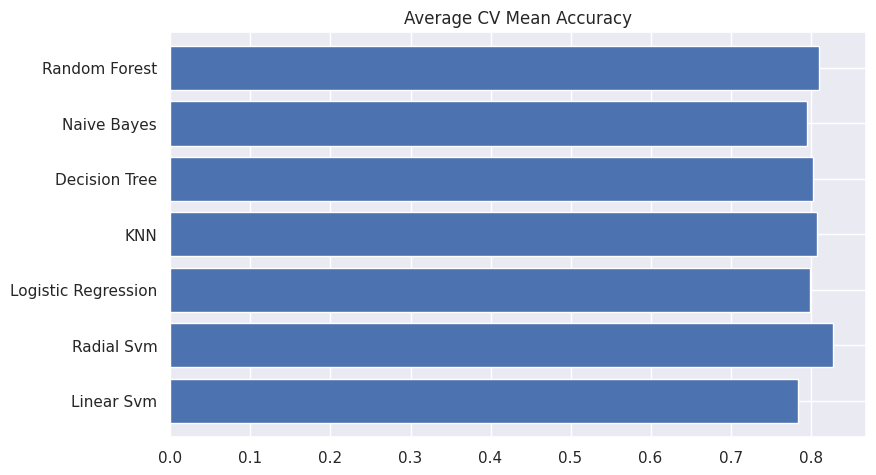

In [62]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- 모델이 어디서 잘못되었는지 또는 모델이 잘못 예측한 클래스를 보여주는 혼동 행렬을 사용하여 요약된 결과를 얻을 수 있음.

## 3-9. Confusion Matrix

Text(0.5, 1.0, 'Matrix for Naive Bayes')

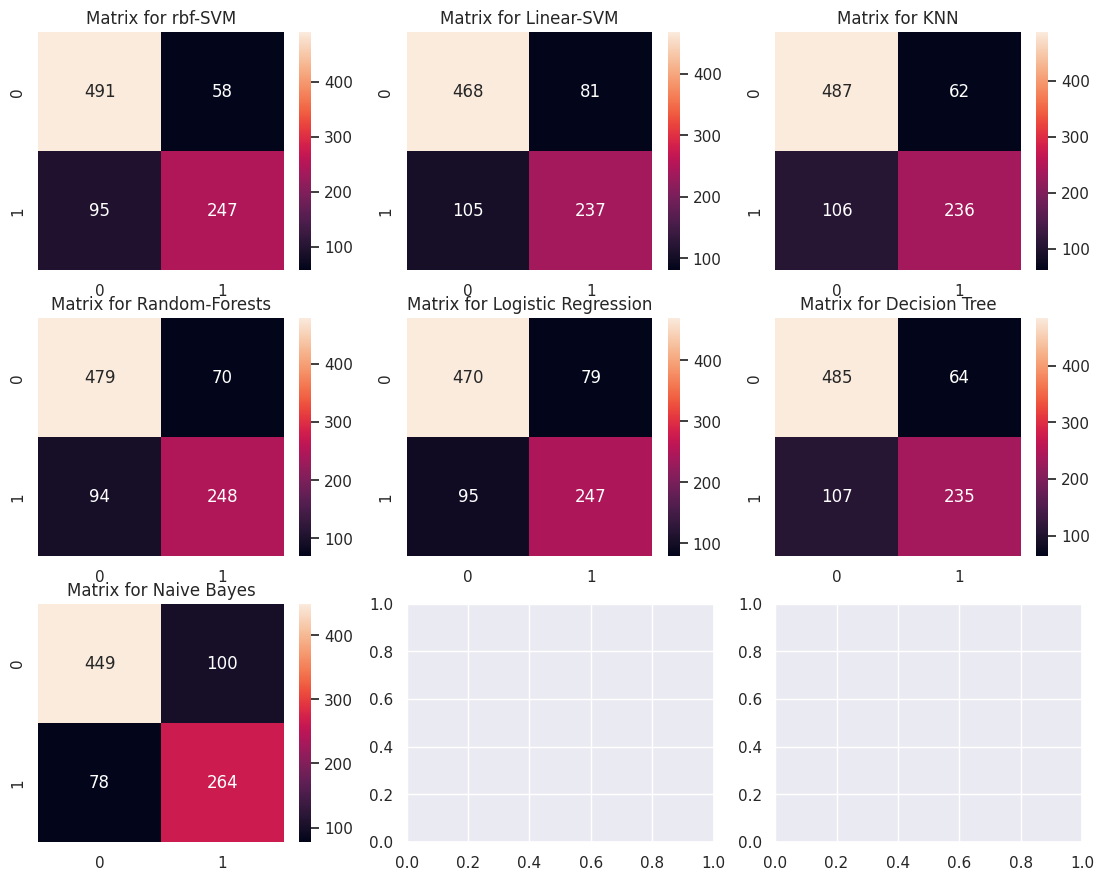

In [63]:
f, ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')


y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')


**Confusion Matrix 해석**
- 왼쪽 대각은 각 클래스에 대한 올바른 예측의 수를 보여주고 오른쪽 대각은 잘못된 예측의 수를 보여줌.

**rbf-SVM**

1) 정확한 예측의 수 = 491(죽은 경우) + 247(생존한 경우). 평균 cv정확도는 (491+247)/891 = 82.8%로 앞서 얻은 것임.
2) 오류 = 58명의 사망자를 생존자로 잘못 분류하고, 95명을 생존자로 분류함. 따라서 사망자를 생존자로 예측하여 더 많은 오류를 범함.

모든 행렬을 살펴보면 rbf-SVM은 죽은 승객을 올바르게 예측할 확률이 높지만, 나이브베이즈는 살아남은 승객을 올바르게 예측할 확률이 더 높다고 할 수 있음.

# 4. Hyper-Parameters Tuning

SVM과 RandomForests 모델에 대한 하이퍼파라미터 튜닝 진행.

## 4-1. SVM

In [64]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf','linear']
hyper = {'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(),param_grid = hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


## 4-2. Random Forests

In [65]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Best Score
- Rbf-Svm : 82.83% with C = 0.4, gamma = 0.3
- Random Forests : 81.9% with n_estimators = 300

# 5. Ensembling
앙상블은 모델의 정확도나 성능을 높이는 좋은 방법임. 다양한 모델을 결합하여 하나의 강력한 모델을 만드는 것.

1) Voting Classifier

2) Bagging

3) Boosting.

## 5-1. Voting Classifier
- 하위 모델의 예측을 기반으로 평균 예측 결과를 제공함.

In [66]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                                    ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                                    ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                                    ('LR',LogisticRegression(C=0.05)),
                                                    ('DT',DecisionTreeClassifier(random_state=0)),
                                                    ('NB',GaussianNB()),
                                                    ('svm',svm.SVC(kernel='linear',probability=True))],
                                        voting ='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring="accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053
